# 1. Problem Statement

In [ ]:
Predicat the heart diseases 

##  2. Import  Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier








































from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split , RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, roc_curve
from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

import json
import pickle

# 3. Data Gathering

In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 4.EDA Part

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Univeriant

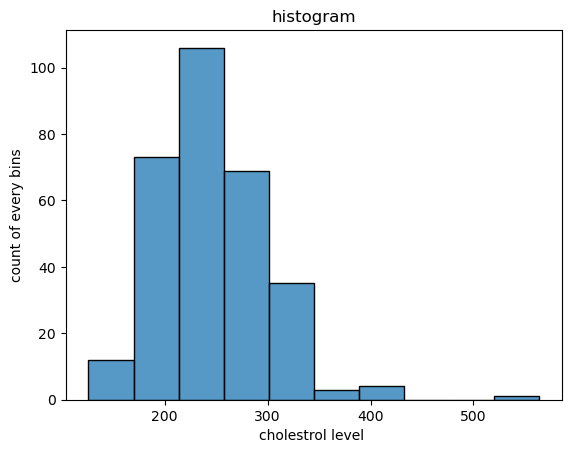

In [9]:

sns.histplot(df['chol'], bins = 10)
plt.title("histogram")
plt.xlabel("cholestrol level ")
plt.ylabel("count of every bins")
plt.show()

In [14]:
# checking outlier present or not

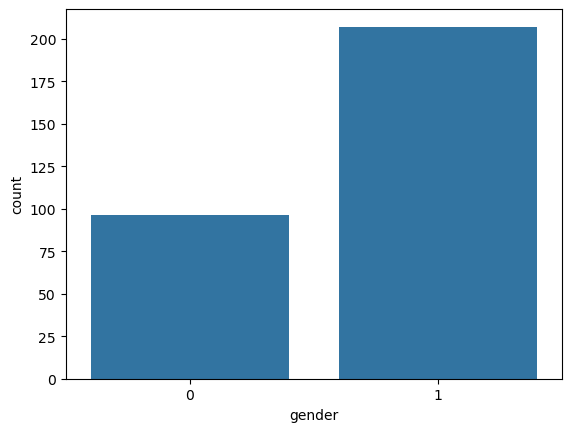

In [16]:

sns.countplot(data=df, x='sex')
plt.xlabel('gender')
plt.show()

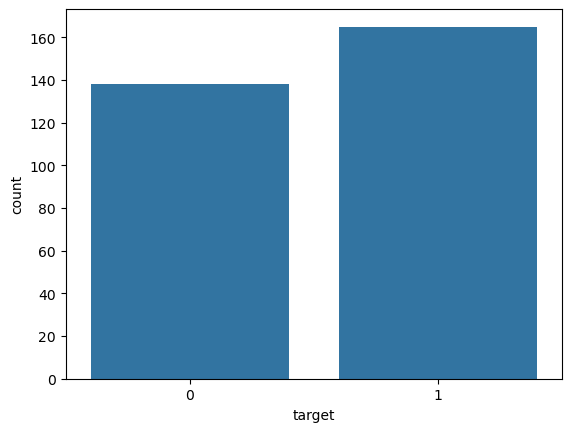

In [18]:

sns.countplot(data=df, x='target')
plt.xlabel('target')
plt.show()

# biavariate analysis

In [21]:
new = pd.crosstab(df['sex'], df['target'])

<Figure size 1000x2000 with 0 Axes>

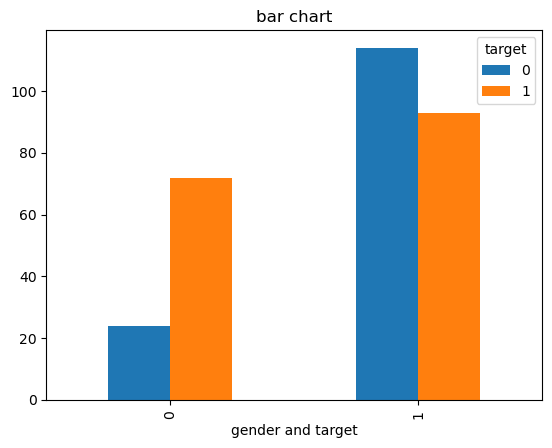

In [23]:
plt.figure(figsize = (10,20))  

new.plot(kind = 'bar')          
plt.title("bar chart")          

plt.xlabel("gender and target") 
plt.show()                      

<Figure size 1000x2000 with 0 Axes>

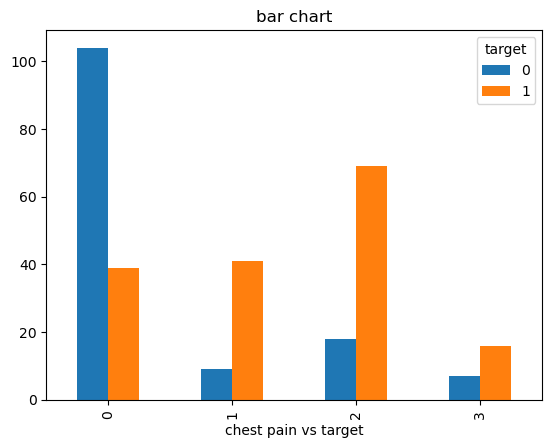

In [25]:
new = pd.crosstab(df['cp'], df['target'])
plt.figure(figsize = (10,20))  

new.plot(kind = 'bar')          
plt.title("bar chart")          

plt.xlabel("chest pain vs target") 
plt.show()                      

### 1.age

<Axes: >

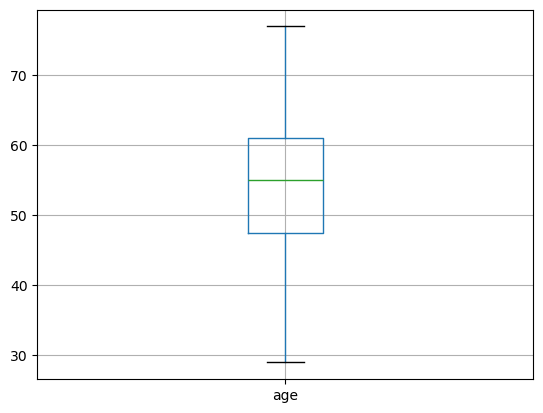

In [29]:
df[['age']].boxplot()

### 2. sex

<Axes: >

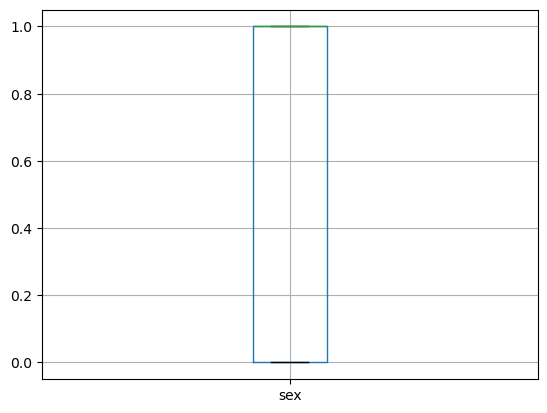

In [32]:
df[['sex']].boxplot()

### 3. cp

<Axes: >

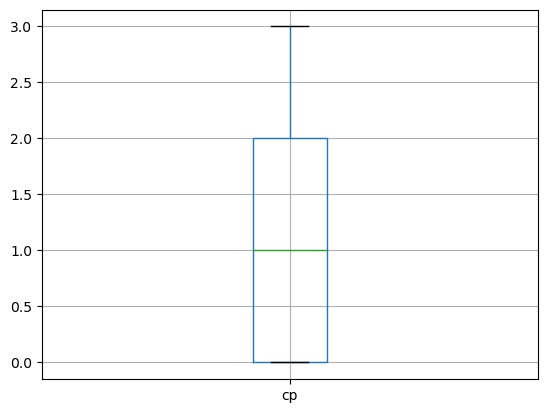

In [35]:
df[['cp']].boxplot()

### 4.trestbps

<Axes: >

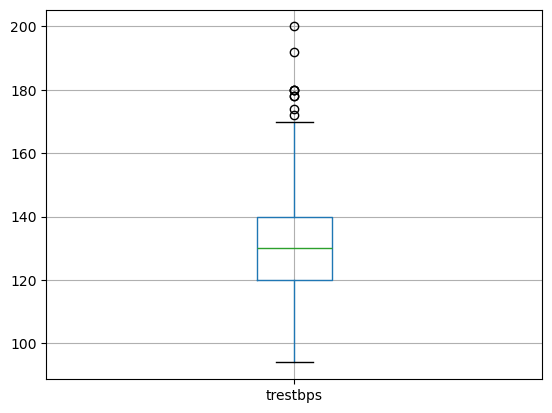

In [38]:
df[['trestbps']].boxplot()

In [40]:
a=np.where(df['trestbps']>=170)[0]
a

array([  8, 101, 110, 152, 195, 203, 223, 228, 241, 248, 260, 266, 292],
      dtype=int64)

In [42]:
q1 = df['trestbps'].quantile(0.25)
q2 = df['trestbps'].quantile(0.50)
q3 = df['trestbps'].quantile(0.75)
median = df['trestbps'].median()

print('q1 :',q1)
print('q2 :',q2)
print('q3 :',q3)
print('median :',median)

iqr =q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print('upper_tail :',upper_tail)
print('lower_tail :',lower_tail)

q1 : 120.0
q2 : 130.0
q3 : 140.0
median : 130.0
upper_tail : 170.0
lower_tail : 90.0


In [44]:
df.loc[(df['trestbps'] > upper_tail) |
      (df['trestbps'] < lower_tail),'trestbps']=np.nan

### 5.chol

<Axes: >

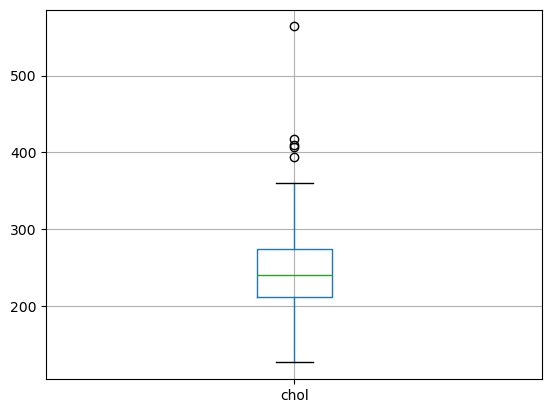

In [48]:
df[['chol']].boxplot()

In [50]:
np.where(df['chol']>=380)[0]

array([ 28,  85,  96, 220, 246], dtype=int64)

In [52]:
df['chol'][28]

417

In [54]:
q1 = df['chol'].quantile(0.25)
q2 = df['chol'].quantile(0.50)
q3 = df['chol'].quantile(0.75)
median = df['chol'].median()

print('q1 :',q1)
print('q2 :',q2)
print('q3 :',q3)
print('median :',median)

iqr =q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print('upper_tail :',upper_tail)
print('lower_tail :',lower_tail)

q1 : 211.0
q2 : 240.0
q3 : 274.5
median : 240.0
upper_tail : 369.75
lower_tail : 115.75


In [56]:
df.loc[(df['chol'] > upper_tail) |
      (df['chol'] < lower_tail), 'chol'] = np.nan

### 6. fbs

<Axes: >

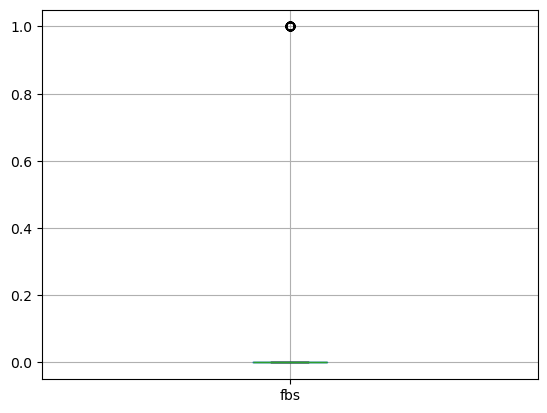

In [59]:
df[['fbs']].boxplot()

### 7. restecg

<Axes: >

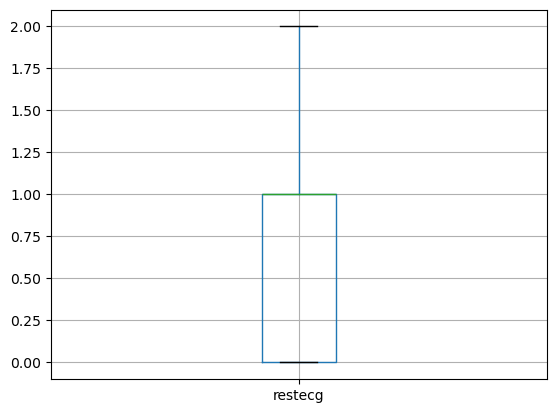

In [63]:
df[['restecg']].boxplot()

### 8. thalach

<Axes: >

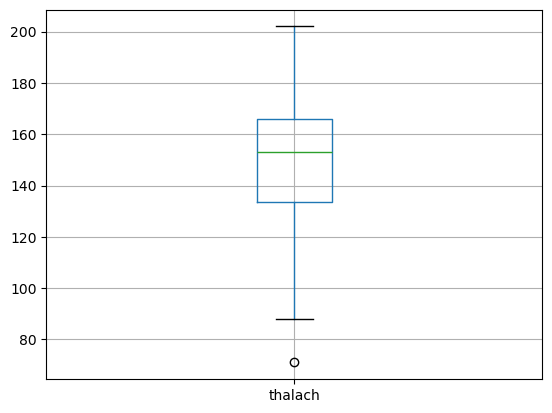

In [66]:
df[['thalach']].boxplot()

In [68]:
np.where(df['thalach']<=80)[0]

array([272], dtype=int64)

In [70]:
df['thalach'][272]

71

In [72]:
q1 = df['thalach'].quantile(0.25)
q2 = df['thalach'].quantile(0.50)
q3 = df['thalach'].quantile(0.75)
median=df['thalach'].median()

print('q1 :',q1)
print('q2 :',q2)
print('q3 :',q3)
print('median :',median)

iqr =q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print('upper_tail :',upper_tail)
print('lower_tail :',lower_tail)

q1 : 133.5
q2 : 153.0
q3 : 166.0
median : 153.0
upper_tail : 214.75
lower_tail : 84.75


In [74]:
df.loc[(df['thalach'] > upper_tail) |
      (df['thalach'] < lower_tail), 'thalach']=np.nan

### 9.exang

<Axes: >

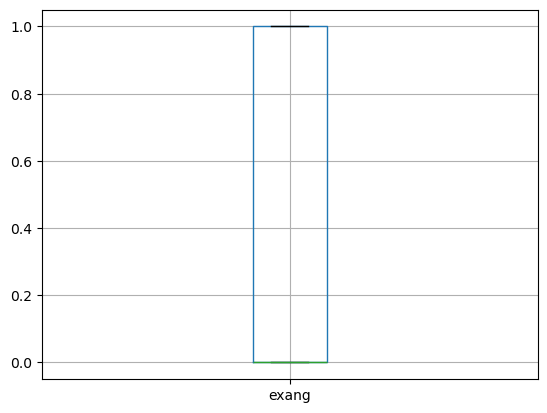

In [77]:
df[['exang']].boxplot()

### 10. oldpeak

<Axes: >

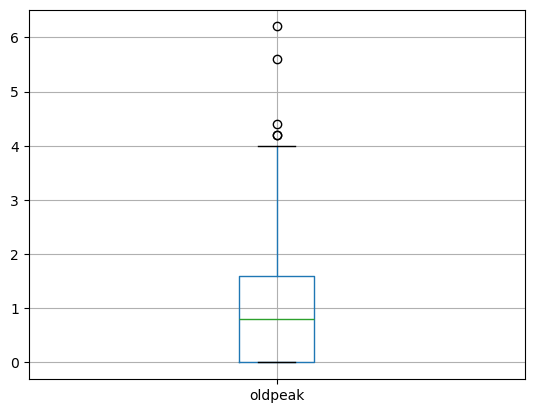

In [80]:
df[['oldpeak']].boxplot()

In [82]:
np.where(df['oldpeak']>=4)[0]

array([101, 204, 220, 221, 223, 250, 291, 295], dtype=int64)

In [84]:
df['oldpeak'][101]

4.2

In [87]:
q1 = df['oldpeak'].quantile(0.25)
q2 = df['oldpeak'].quantile(0.50)
q3 = df['oldpeak'].quantile(0.75)
median=df['oldpeak'].median()

print('q1 :',q1)
print('q2 :',q2)
print('q3 :',q3)
print('median :',median)

iqr =q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print('upper_tail :',upper_tail)
print('lower_tail :',lower_tail)

q1 : 0.0
q2 : 0.8
q3 : 1.6
median : 0.8
upper_tail : 4.0
lower_tail : -2.4000000000000004


In [89]:
df.loc[(df['oldpeak'] > upper_tail) |
      (df['oldpeak'] < lower_tail), 'oldpeak']=np.nan

### 11.slope

<Axes: >

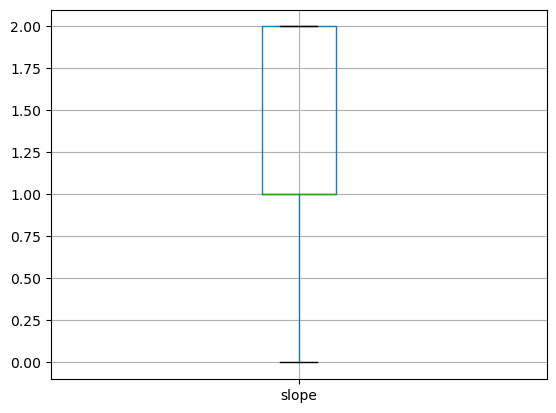

In [94]:
df[['slope']].boxplot()

### 12. ca

<Axes: >

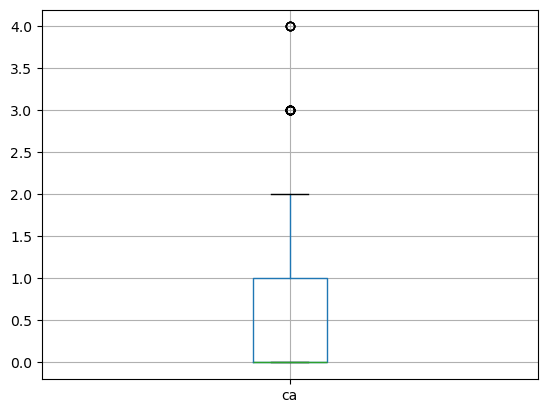

In [97]:
df[['ca']].boxplot()

In [99]:
np.where(df['ca']>=2.9)[0]

array([ 52,  92,  97,  99, 158, 163, 164, 165, 181, 191, 204, 208, 217,
       220, 231, 234, 238, 247, 249, 250, 251, 252, 255, 267, 291],
      dtype=int64)

In [101]:
df['ca'][52]

3

In [103]:
q1 = df['ca'].quantile(0.25)
q2 = df['ca'].quantile(0.50)
q3 = df['ca'].quantile(0.75)
median=df['ca'].median()

print('q1 :',q1)
print('q2 :',q2)
print('q3 :',q3)
print('median :',median)

iqr =q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print('upper_tail :',upper_tail)
print('lower_tail :',lower_tail)

q1 : 0.0
q2 : 0.0
q3 : 1.0
median : 0.0
upper_tail : 2.5
lower_tail : -1.5


In [105]:
df.loc[(df['ca'] > upper_tail) |
      (df['ca'] < lower_tail) , 'ca']=np.nan

### 13. thal

<Axes: >

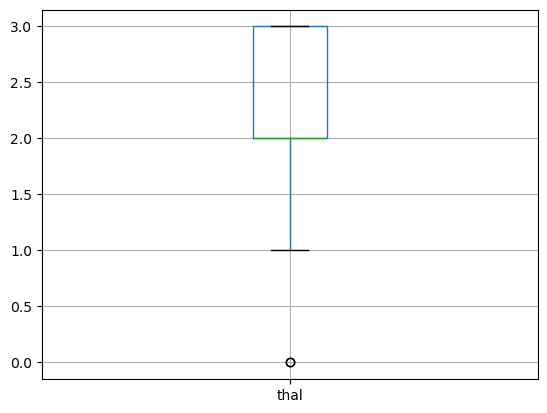

In [108]:
df[['thal']].boxplot()

In [38]:
np.where(df['thal']<=0.1)[0]

array([ 48, 281], dtype=int64)

In [39]:
df['thal'][48]

0

In [40]:
q1 = df['thal'].quantile(0.25)
q2 = df['thal'].quantile(0.50)
q3 = df['thal'].quantile(0.75)
median=df['thal'].median()

print('q1 :',q1)
print('q2 :',q2)
print('q3 :',q3)
print('median :',median)

iqr =q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print('upper_tail :',upper_tail)
print('lower_tail :',lower_tail)

q1 : 2.0
q2 : 2.0
q3 : 3.0
median : 2.0
upper_tail : 4.5
lower_tail : 0.5


In [41]:
df.loc[(df['thal'] > upper_tail) |
      (df['thal'] < lower_tail) , 'thal']=np.nan

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  294 non-null    float64
 4   chol      298 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   298 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        278 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 33.3 KB


In [130]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0.0,2,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0.0,3,0
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0.0,3,0
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2.0,3,0
301,57,1,0,130.0,131.0,0,1,115.0,1,1.2,1,1.0,3,0


<Axes: >

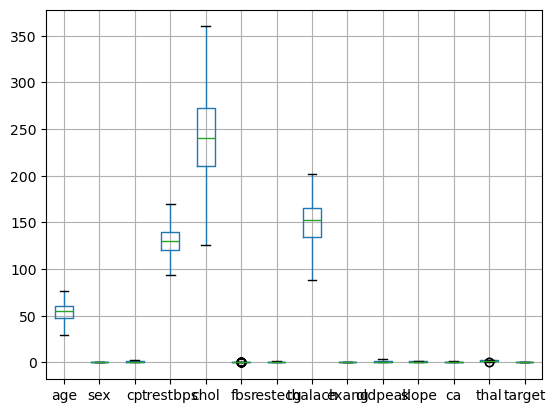

In [132]:
df.boxplot()

# check correlation matrix

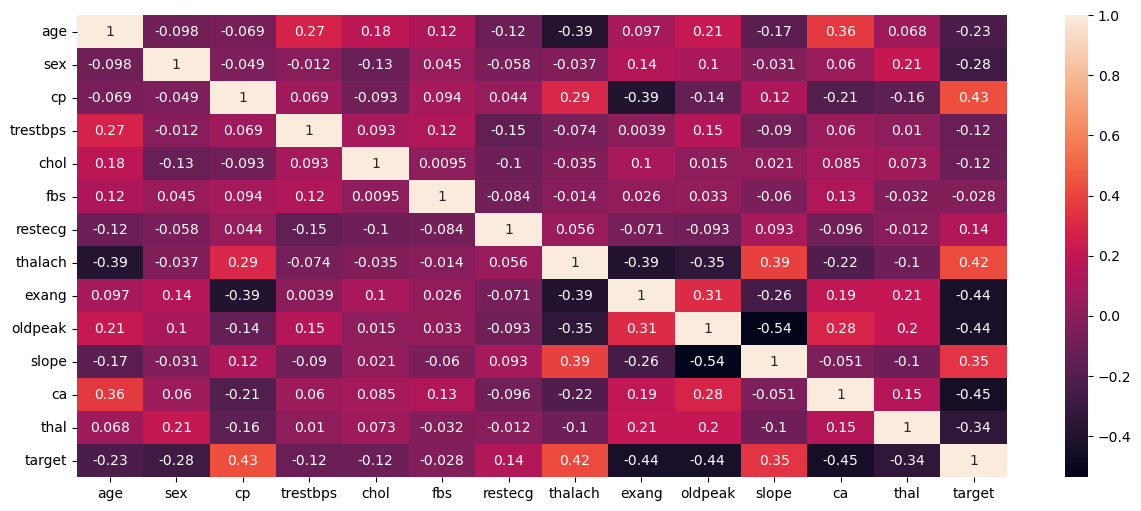

In [134]:
# Calculate the correlation matrix
plt.figure(figsize = (15,6))
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [45]:
# for impute nan value we used KNNImputer 

In [136]:
x = df.drop('target',axis=1)
y = df['target']

In [152]:
knn_imputer = KNNImputer(n_neighbors=5)
array = knn_imputer.fit_transform(df)
df1 = pd.DataFrame(array,columns=df.columns)
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


<Axes: >

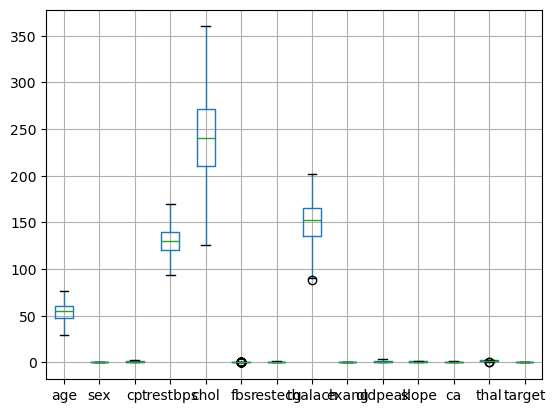

In [154]:
df1.boxplot()

In [158]:
final_result = {'accuracy_train':[],'accuracy_test':[],'precision':[],'recall':[],'F1':[]}
index=[]

# train test split

In [161]:
x = df1.drop('target',axis=1)
y = df1['target']

In [166]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

# 1. Logistc Regression

### 1.assumption

<Axes: >

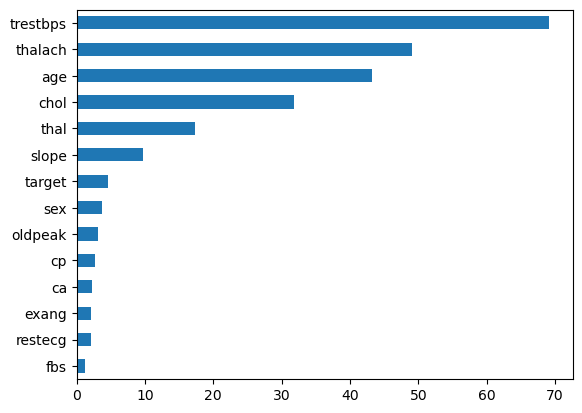

In [170]:
vif_list=[]
for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1,i)
    vif_list.append(vif)
    
s1=pd.Series(vif_list,index=df1.columns)
s1.sort_values().plot(kind='barh')

In [172]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

C:\Users\Bhupendra Rathor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [174]:
# evaluation on testing dataset

y_pred = log_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('confusion_matrix :\n',cnf_matrix)

accuracy_test= accuracy_score(y_test,y_pred)
print('accuracy score :',accuracy_test)

clss_report = classification_report(y_test,y_pred)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_test,y_pred),2)
print('precision:',precision)

recall = np.around(recall_score(y_test,y_pred),2)
print('recall :',recall)

F1 =np.around(f1_score(y_test,y_pred),2)
print('F1 :',F1)

confusion_matrix :
 [[23  5]
 [ 3 30]]
accuracy score : 0.8688524590163934
classification report :
               precision    recall  f1-score   support

         0.0       0.88      0.82      0.85        28
         1.0       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

precision: 0.86
recall : 0.91
F1 : 0.88


In [176]:
# evaluation on training dataset

y_pred_train = log_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('confusion_matrix :\n',cnf_matrix)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('accuracy score :',accuracy_train)

clss_report = classification_report(y_train,y_pred_train)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_train,y_pred_train),2)
print('precision:',precision)

recall = np.around(recall_score(y_train,y_pred_train),2)
print('recall :',recall)

F1 =np.around(f1_score(y_train,y_pred_train),2)
print('F1 :',F1)

confusion_matrix :
 [[ 84  26]
 [ 12 120]]
accuracy score : 0.8429752066115702
classification report :
               precision    recall  f1-score   support

         0.0       0.88      0.76      0.82       110
         1.0       0.82      0.91      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242

precision: 0.82
recall : 0.91
F1 : 0.86


In [180]:
final_result['accuracy_train'].append(accuracy_train)
final_result['accuracy_test'].append(accuracy_test)
final_result['precision'].append(precision)
final_result['recall'].append(recall)
final_result['F1'].append(F1)
index.append("Logistic_Model")

# 2. KNN Algorithm

In [183]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


### In Knn algorithm for best result we want to scaled feature for that we used standarization

### 1.standadization

In [187]:
x=df1.drop('target',axis=1)
y=df1['target']

In [189]:
std_scaler=StandardScaler()
array=std_scaler.fit_transform(x)
df2=pd.DataFrame(array,columns=x.columns)
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.971197,-0.230324,2.394438,-1.005832,0.005299,-0.696631,1.261872,-2.274579,-0.735183,-2.148873
1,-1.915313,0.681005,1.002577,-0.017357,0.149981,-0.417635,0.898962,1.655640,-0.696631,2.411328,-2.274579,-0.735183,-0.512922
2,-1.474158,-1.468418,0.032031,-0.017357,-0.879080,-0.417635,-1.005832,0.986583,-0.696631,0.399780,0.976352,-0.735183,-0.512922
3,0.180175,0.681005,0.032031,-0.676392,-0.163212,-0.417635,0.898962,1.254206,-0.696631,-0.174947,0.976352,-0.735183,-0.512922
4,0.290464,-1.468418,-0.938515,-0.676392,2.476553,-0.417635,0.898962,0.585149,1.435481,-0.366523,0.976352,-0.735183,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.641679,-0.051357,-0.417635,0.898962,-1.199003,1.435481,-0.749675,-0.649113,-0.735183,1.123029
299,-1.033002,0.681005,1.973123,-1.335428,0.463173,-0.417635,0.898962,-0.797569,-0.696631,0.208205,-0.649113,-0.735183,1.123029
300,1.503641,0.681005,-0.938515,0.905293,-1.125160,2.394438,0.898962,-0.396135,-0.696631,2.315540,-0.649113,2.109778,1.123029
301,0.290464,0.681005,-0.938515,-0.017357,-2.512155,-0.417635,0.898962,-1.555833,1.435481,0.208205,-0.649113,0.687298,1.123029


In [191]:
x = df2
y =y=df1['target']

# Train test split

In [194]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [196]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
24,-1.584446,0.681005,1.973123,0.641679,-0.990934,-0.417635,0.898962,1.254206,1.435481,0.399780,0.976352,-0.735183,1.123029
67,-1.033002,-1.468418,0.032031,-0.017357,-0.207953,-0.417635,-1.005832,1.120394,-0.696631,-0.366523,-0.649113,-0.735183,-0.512922
13,1.062485,0.681005,1.973123,-1.335428,-0.722484,-0.417635,-1.005832,-0.262323,1.435481,0.782932,-0.649113,-0.735183,-0.512922
112,1.062485,-1.468418,1.002577,0.641679,1.559347,-0.417635,0.898962,-0.752965,-0.696631,-0.749675,0.976352,-0.735183,1.123029
80,-1.474158,0.681005,1.002577,-1.203621,0.149981,-0.417635,0.898962,1.298809,-0.696631,-0.941251,0.976352,-0.735183,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.180175,0.681005,0.032031,-0.676392,-0.073728,-0.417635,0.898962,0.852771,-0.696631,-0.941251,-2.274579,-0.735183,-0.512922
234,1.724218,0.681005,-0.938515,-0.017357,1.760685,-0.417635,-1.005832,-1.823456,-0.696631,1.357660,-0.649113,0.402801,-0.512922
110,1.062485,-1.468418,-0.938515,0.391245,1.827798,-0.417635,0.898962,0.183715,1.435481,-0.941251,0.976352,-0.735183,-0.512922
190,-0.371269,-1.468418,-0.938515,-0.017357,1.380380,-0.417635,0.898962,-0.351531,1.435481,0.208205,-0.649113,-0.735183,1.123029


# Model Training

In [199]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [201]:
# evaluation on testing dataset

y_pred = KNN_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('confusion_matrix :\n',cnf_matrix)

accuracy_test= accuracy_score(y_test,y_pred)
print('accuracy score :',accuracy_test)

clss_report = classification_report(y_test,y_pred)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_test,y_pred),2)
print('precision:',precision)

recall = np.around(recall_score(y_test,y_pred),2)
print('recall :',recall)

F1 =np.around(f1_score(y_test,y_pred),2)
print('F1 :',F1)

confusion_matrix :
 [[22  6]
 [ 3 30]]
accuracy score : 0.8524590163934426
classification report :
               precision    recall  f1-score   support

         0.0       0.88      0.79      0.83        28
         1.0       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

precision: 0.83
recall : 0.91
F1 : 0.87


In [203]:
# evaluation on training dataset

y_pred_train = KNN_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('confusion_matrix :\n',cnf_matrix)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('accuracy score :',accuracy_train)

clss_report = classification_report(y_train,y_pred_train)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_train,y_pred_train),2)
print('precision:',precision)

recall = np.around(recall_score(y_train,y_pred_train),2)
print('recall :',recall)

F1 =np.around(f1_score(y_train,y_pred_train),2)
print('F1 :',F1)

confusion_matrix :
 [[ 93  17]
 [ 12 120]]
accuracy score : 0.8801652892561983
classification report :
               precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       110
         1.0       0.88      0.91      0.89       132

    accuracy                           0.88       242
   macro avg       0.88      0.88      0.88       242
weighted avg       0.88      0.88      0.88       242

precision: 0.88
recall : 0.91
F1 : 0.89


### Now we check accuracy by using Hyperparameter tuning

In [207]:
KNN_model = KNeighborsClassifier()

Hyperparameter = {"n_neighbors" : np.arange(3,30),
                  'p' :[1,2]}
                  
gscv_knn_model=GridSearchCV(KNN_model,Hyperparameter,cv=5)
gscv_knn_model.fit(x_train,y_train)                 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [208]:
knn_cll=gscv_knn_model.best_estimator_

# evaluation on testing dataset

y_pred = knn_cll.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('confusion_matrix :\n',cnf_matrix)

accuracy_test= accuracy_score(y_test,y_pred)
print('accuracy score :',accuracy_test)

clss_report = classification_report(y_test,y_pred)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_test,y_pred),2)
print('precision:',precision)

recall = np.around(recall_score(y_test,y_pred),2)
print('recall :',recall)

F1 =np.around(f1_score(y_test,y_pred),2)

confusion_matrix :
 [[22  6]
 [ 4 29]]
accuracy score : 0.8360655737704918
classification report :
               precision    recall  f1-score   support

         0.0       0.85      0.79      0.81        28
         1.0       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

precision: 0.83
recall : 0.88


In [209]:
# evaluation on training dataset

y_pred_train = knn_cll.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('confusion_matrix :\n',cnf_matrix)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('accuracy score :',accuracy_train)

clss_report = classification_report(y_train,y_pred_train)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_train,y_pred_train),2)
print('precision:',precision)

recall = np.around(recall_score(y_train,y_pred_train),2)
print('recall :',recall)

F1 =np.around(f1_score(y_train,y_pred_train),2)
print('F1 :',F1)

confusion_matrix :
 [[ 81  29]
 [  9 123]]
accuracy score : 0.8429752066115702
classification report :
               precision    recall  f1-score   support

         0.0       0.90      0.74      0.81       110
         1.0       0.81      0.93      0.87       132

    accuracy                           0.84       242
   macro avg       0.85      0.83      0.84       242
weighted avg       0.85      0.84      0.84       242

precision: 0.81
recall : 0.93
F1 : 0.87


In [210]:
final_result['accuracy_train'].append(accuracy_train)
final_result['accuracy_test'].append(accuracy_test)
final_result['precision'].append(precision)
final_result['recall'].append(recall)
final_result['F1'].append(F1)
index.append("KNN with Hyperparameter")

# Decision Tree Classifier Algorithm

In [217]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [219]:
x = df1.drop('target',axis=1)
y = df1['target']

# train_test_split

In [222]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=9,stratify=y)

# Model Trainig

In [225]:
DT_clf = DecisionTreeClassifier()
DT_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [227]:
# evaluation on testing dataset

y_pred = DT_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('confusion_matrix :\n',cnf_matrix)

accuracy_test= accuracy_score(y_test,y_pred)
print('accuracy score :',accuracy_test)

clss_report = classification_report(y_test,y_pred)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_test,y_pred),2)
print('precision:',precision)

recall = np.around(recall_score(y_test,y_pred),2)
print('recall :',recall)

F1 =np.around(f1_score(y_test,y_pred),2)

confusion_matrix :
 [[21  7]
 [ 9 24]]
accuracy score : 0.7377049180327869
classification report :
               precision    recall  f1-score   support

         0.0       0.70      0.75      0.72        28
         1.0       0.77      0.73      0.75        33

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

precision: 0.77
recall : 0.73


In [229]:
# evaluation on training dataset

y_pred_train = DT_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('confusion_matrix :\n',cnf_matrix)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('accuracy score :',accuracy_train)

clss_report = classification_report(y_train,y_pred_train)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_train,y_pred_train),2)
print('precision:',precision)

recall = np.around(recall_score(y_train,y_pred_train),2)
print('recall :',recall)

F1 =np.around(f1_score(y_train,y_pred_train),2)
print('F1 :',F1)

confusion_matrix :
 [[110   0]
 [  0 132]]
accuracy score : 1.0
classification report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       110
         1.0       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

precision: 1.0
recall : 1.0
F1 : 1.0


### Here our model is overfitting for remove that we used Hyperparameter Tuning

In [232]:
DT_clf_model = DecisionTreeClassifier()

Hyperparameters = {'criterion': ['gini','entropy'],
                 'max_depth':np.arange(3,8),
                 'min_samples_split':np.arange(2,8),
                 'min_samples_leaf':np.arange(2,5)}

gsvc_DT_model = GridSearchCV(DT_clf_model,Hyperparameters,cv=5)
gsvc_DT_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([2, 3, 4]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [233]:
gsvc_DT_model.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [234]:
Dt_clf =gsvc_DT_model.best_estimator_
Dt_clf.fit(x_train, y_train)

y_pred = Dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('confusion_matrix :\n',cnf_matrix)

accuracy_test= accuracy_score(y_test,y_pred)
print('accuracy score :',accuracy_test)

clss_report = classification_report(y_test,y_pred)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_test,y_pred),2)
print('precision:',precision)

recall = np.around(recall_score(y_test,y_pred),2)
print('recall :',recall)

F1 =np.around(f1_score(y_test,y_pred),2)

confusion_matrix :
 [[19  9]
 [ 4 29]]
accuracy score : 0.7868852459016393
classification report :
               precision    recall  f1-score   support

         0.0       0.83      0.68      0.75        28
         1.0       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61

precision: 0.76
recall : 0.88


In [235]:
# evaluation on training dataset

y_pred_train = Dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('confusion_matrix :\n',cnf_matrix)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('accuracy score :',accuracy_train)

clss_report = classification_report(y_train,y_pred_train)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_train,y_pred_train),2)
print('precision:',precision)

recall = np.around(recall_score(y_train,y_pred_train),2)
print('recall :',recall)

F1 =np.around(f1_score(y_train,y_pred_train),2)
print('F1 :',F1)

confusion_matrix :
 [[ 83  27]
 [ 10 122]]
accuracy score : 0.8471074380165289
classification report :
               precision    recall  f1-score   support

         0.0       0.89      0.75      0.82       110
         1.0       0.82      0.92      0.87       132

    accuracy                           0.85       242
   macro avg       0.86      0.84      0.84       242
weighted avg       0.85      0.85      0.85       242

precision: 0.82
recall : 0.92
F1 : 0.87


In [237]:
final_result['accuracy_train'].append(accuracy_train)
final_result['accuracy_test'].append(accuracy_test)
final_result['precision'].append(precision)
final_result['recall'].append(recall)
final_result['F1'].append(F1)
index.append("Decision Tree With Hyperparameter")

# Pruning

In [244]:
DT_clf_p = DecisionTreeClassifier()
DT_clf_p.fit(x_train, y_train)

DecisionTreeClassifier()

In [246]:
# evaluation on Testing dataset

y_pred = DT_clf_p.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('confusion_matrix :\n',cnf_matrix)

accuracy_test= accuracy_score(y_test,y_pred)
print('accuracy score :',accuracy_test)

clss_report = classification_report(y_test,y_pred)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_test,y_pred),2)
print('precision:',precision)

recall = np.around(recall_score(y_test,y_pred),2)
print('recall :',recall)

F1 =np.around(f1_score(y_test,y_pred),2)

confusion_matrix :
 [[21  7]
 [ 9 24]]
accuracy score : 0.7377049180327869
classification report :
               precision    recall  f1-score   support

         0.0       0.70      0.75      0.72        28
         1.0       0.77      0.73      0.75        33

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

precision: 0.77
recall : 0.73


In [248]:
# evaluation on training dataset

y_pred_train = DT_clf_p.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('confusion_matrix :\n',cnf_matrix)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('accuracy score :',accuracy_train)

clss_report = classification_report(y_train,y_pred_train)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_train,y_pred_train),2)
print('precision:',precision)

recall = np.around(recall_score(y_train,y_pred_train),2)
print('recall :',recall)

F1 =np.around(f1_score(y_train,y_pred_train),2)
print('F1 :',F1)

confusion_matrix :
 [[110   0]
 [  0 132]]
accuracy score : 1.0
classification report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       110
         1.0       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

precision: 1.0
recall : 1.0
F1 : 1.0


### For Pruning we used cost complexity Pruning path

In [251]:
pruning_result = DT_clf_p.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list=pruning_result['ccp_alphas']
ccp_alpha_list

array([0.        , 0.00381437, 0.00390266, 0.00404614, 0.00406866,
       0.00550964, 0.00550964, 0.00601052, 0.00619835, 0.0063096 ,
       0.00661157, 0.00688705, 0.00721262, 0.00751315, 0.00761093,
       0.00789073, 0.00904082, 0.00939539, 0.00961683, 0.00995173,
       0.01043932, 0.01239669, 0.01560423, 0.02427806, 0.02946333,
       0.03467722, 0.15922865])

In [253]:
test_accuracy_list=[]
train_accuracy_list=[]
for i in ccp_alpha_list:
    dt_pruning_model=DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    dt_pruning_model.fit(x_train,y_train)
    train_accuracy_list.append(dt_pruning_model.score(x_train,y_train))
    test_accuracy_list.append(dt_pruning_model.score(x_test, y_test))
    
test_accuracy_list

[0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.7868852459016393,
 0.7868852459016393,
 0.819672131147541,
 0.7540983606557377,
 0.7213114754098361,
 0.6065573770491803,
 0.6557377049180327,
 0.6557377049180327,
 0.5409836065573771]

In [255]:
train_accuracy_list

[1.0,
 0.9958677685950413,
 0.9917355371900827,
 0.987603305785124,
 0.9834710743801653,
 0.9834710743801653,
 0.9710743801652892,
 0.9628099173553719,
 0.9586776859504132,
 0.9504132231404959,
 0.9462809917355371,
 0.9421487603305785,
 0.9380165289256198,
 0.9338842975206612,
 0.9214876033057852,
 0.9173553719008265,
 0.9049586776859504,
 0.8925619834710744,
 0.8842975206611571,
 0.8553719008264463,
 0.8512396694214877,
 0.8305785123966942,
 0.8264462809917356,
 0.7851239669421488,
 0.7851239669421488,
 0.7851239669421488,
 0.5454545454545454]

In [257]:
np.where(test_accuracy_list == np.max(test_accuracy_list))

(array([20], dtype=int64),)

In [259]:
test_accuracy_list[12]

0.7704918032786885

In [261]:
train_accuracy_list[12]

0.9380165289256198

In [263]:
ccp_alpha_list[12]

0.007212622088655141

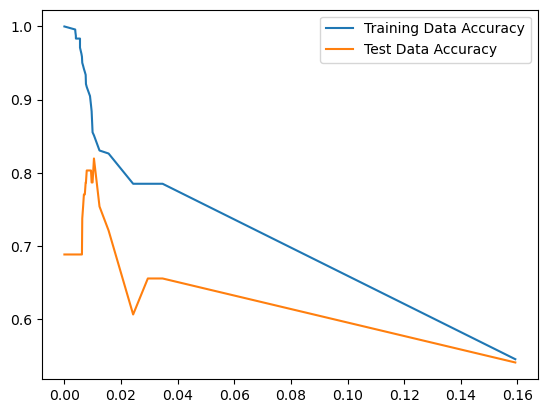

In [265]:
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Test Data Accuracy")
ax.legend()

In [267]:
decision_tree_model = DecisionTreeClassifier(random_state=10,ccp_alpha=ccp_alpha_list[12])
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.007212622088655141, random_state=10)

In [269]:

y_pred = decision_tree_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('confusion_matrix :\n',cnf_matrix)

accuracy_test= accuracy_score(y_test,y_pred)
print('accuracy score :',accuracy_test)

clss_report = classification_report(y_test,y_pred)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_test,y_pred),2)
print('precision:',precision)

recall = np.around(recall_score(y_test,y_pred),2)
print('recall :',recall)


confusion_matrix :
 [[21  7]
 [ 7 26]]
accuracy score : 0.7704918032786885
classification report :
               precision    recall  f1-score   support

         0.0       0.75      0.75      0.75        28
         1.0       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

precision: 0.79
recall : 0.79


In [271]:
# evaluation on training dataset

y_pred_train = decision_tree_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('confusion_matrix :\n',cnf_matrix)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('accuracy score :',accuracy_train)

clss_report = classification_report(y_train,y_pred_train)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_train,y_pred_train),2)
print('precision:',precision)

recall = np.around(recall_score(y_train,y_pred_train),2)
print('recall :',recall)

F1 =np.around(f1_score(y_train,y_pred_train),2)
print('F1 :',F1)

confusion_matrix :
 [[103   7]
 [  2 130]]
accuracy score : 0.9628099173553719
classification report :
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       110
         1.0       0.95      0.98      0.97       132

    accuracy                           0.96       242
   macro avg       0.96      0.96      0.96       242
weighted avg       0.96      0.96      0.96       242

precision: 0.95
recall : 0.98
F1 : 0.97


In [273]:
final_result['accuracy_train'].append(accuracy_train)
final_result['accuracy_test'].append(accuracy_test)
final_result['precision'].append(precision)
final_result['recall'].append(recall)
final_result['F1'].append(F1)
index.append("Decision Tree With Pruning")

# Random Forest Classification Algorithm

In [277]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


# train_test_split

In [280]:
df1['target'].value_counts()

target
1.0    165
0.0    138
Name: count, dtype: int64

In [282]:
x = df1.drop('target',axis=1)
y = df1['target']

In [284]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=9,stratify=y)

# Model Training

In [287]:
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

RandomForestClassifier()

In [289]:
# evaluation on Testing dataset

y_pred = RF_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('confusion_matrix :\n',cnf_matrix)

accuracy_test= accuracy_score(y_test,y_pred)
print('accuracy score :',accuracy_test)

clss_report = classification_report(y_test,y_pred)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_test,y_pred),2)
print('precision:',precision)

recall = np.around(recall_score(y_test,y_pred),2)
print('recall :',recall)

F1 =np.around(f1_score(y_test,y_pred),2)

confusion_matrix :
 [[22  6]
 [ 3 30]]
accuracy score : 0.8524590163934426
classification report :
               precision    recall  f1-score   support

         0.0       0.88      0.79      0.83        28
         1.0       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

precision: 0.83
recall : 0.91


In [291]:
# evaluation on training dataset

y_pred_train = RF_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('confusion_matrix :\n',cnf_matrix)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('accuracy score :',accuracy_train)

clss_report = classification_report(y_train,y_pred_train)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_train,y_pred_train),2)
print('precision:',precision)

recall = np.around(recall_score(y_train,y_pred_train),2)
print('recall :',recall)

F1 =np.around(f1_score(y_train,y_pred_train),2)
print('F1 :',F1)

confusion_matrix :
 [[110   0]
 [  0 132]]
accuracy score : 1.0
classification report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       110
         1.0       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

precision: 1.0
recall : 1.0
F1 : 1.0


# Random Forest Hyperparameter Tuning

In [344]:
RF_model = RandomForestClassifier()

hyperparameters= {
                "n_estimators" :np.arange(50,150),
                "criterion" : ['gini','entropy'],
                "max_depth" : np.arange(3, 8),
                "min_samples_split" : np.arange(4,20), 
                "min_samples_leaf" : np.arange(2,10),
                "oob_score" : [True],
                "random_state" : [0]
                    }

rscv_model = RandomizedSearchCV(RF_model,hyperparameters,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149]),
                                        'oob_score': [True],
                                        'random_state': [0]})

In [345]:
rscv_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=7, n_estimators=97, oob_score=True,
                       random_state=0)

In [346]:
Random_model = rscv_model.best_estimator_
Random_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=7, n_estimators=97, oob_score=True,
                       random_state=0)

In [347]:
# evaluation on Testing dataset

y_pred = Random_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('confusion_matrix :\n',cnf_matrix)

accuracy_test= accuracy_score(y_test,y_pred)
print('accuracy score :',accuracy_test)

clss_report = classification_report(y_test,y_pred)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_test,y_pred),2)
print('precision:',precision)

recall = np.around(recall_score(y_test,y_pred),2)
print('recall :',recall)

F1 =np.around(f1_score(y_test,y_pred),2)

confusion_matrix :
 [[23  5]
 [ 1 32]]
accuracy score : 0.9016393442622951
classification report :
               precision    recall  f1-score   support

         0.0       0.96      0.82      0.88        28
         1.0       0.86      0.97      0.91        33

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61

precision: 0.86
recall : 0.97


In [107]:
# evaluation on training dataset

y_pred_train = Random_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('confusion_matrix :\n',cnf_matrix)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('accuracy score :',accuracy_train)

clss_report = classification_report(y_train,y_pred_train)
print('classification report :\n',clss_report)

precision =np.around(precision_score(y_train,y_pred_train),2)
print('precision:',precision)

recall = np.around(recall_score(y_train,y_pred_train),2)
print('recall :',recall)

F1 =np.around(f1_score(y_train,y_pred_train),2)
print('F1 :',F1)

confusion_matrix :
 [[ 89  21]
 [  8 124]]
accuracy score : 0.8801652892561983
classification report :
               precision    recall  f1-score   support

         0.0       0.92      0.81      0.86       110
         1.0       0.86      0.94      0.90       132

    accuracy                           0.88       242
   macro avg       0.89      0.87      0.88       242
weighted avg       0.88      0.88      0.88       242

precision: 0.86
recall : 0.94
F1 : 0.9


# conclusion

In [348]:
final_result['accuracy_train'].append(accuracy_train)
final_result['accuracy_test'].append(accuracy_test)
final_result['precision'].append(precision)
final_result['recall'].append(recall)
final_result['F1'].append(F1)
index.append("Random Forest With Hyperparameter")

In [349]:
DF4 = pd.DataFrame(final_result,index=index)
DF4

,accuracy_train,accuracy_test,precision,recall,F1
Logistic_Model,0.842975,0.868852,0.82,0.91,0.86
Logistic_Model,0.842975,0.868852,0.82,0.91,0.86
KNN with Hyperparameter,0.842975,0.836066,0.81,0.93,0.87
Decision Tree With Hyperparameter,0.847107,0.786885,0.82,0.92,0.87
Decision Tree With Pruning,0.962810,0.770492,0.95,0.98,0.97
Random Forest With Hyperparameter,1.000000,0.852459,1.00,1.00,1.00
Random Forest With Hyperparameter,1.000000,0.852459,1.00,1.00,1.00
Random Forest With Hyperparameter,1.000000,0.901639,0.86,0.97,0.91


<Axes: >

<Figure size 10000x10000 with 0 Axes>

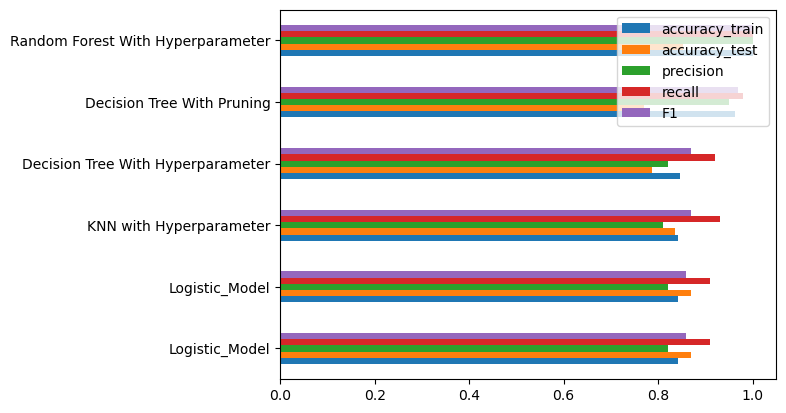

In [319]:
plt.figure(figsize=(100,100))
DF4.plot(kind='barh')

# Our Conclusion is with Random Forest with Hyperparameter Tuning Gives the Best Result for this Dataset

In [321]:
x.head(1).T

,0
age,63.0
sex,1.0
cp,3.0
trestbps,145.0
chol,233.0
fbs,1.0
restecg,0.0
thalach,150.0
exang,0.0
oldpeak,2.3


# Testing on Single Row

In [324]:
x.shape

(303, 13)

In [326]:
test_array = np.zeros(13)
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [328]:
age     = 62.0
sex     = 1.0
cp      = 3.0
trestbps= 147.0
chol    = 243.0
fbs     = 1.0
restecg = 0.0
thalach = 153.0
exang   = 0.0
oldpeak = 2.5
slope   = 0.0
ca      = 0.0
thal    = 1.0

In [356]:
test_array[0] = age
test_array[1] = sex
test_array[2] = cp
test_array[3] = trestbps
test_array[4] = chol
test_array[5] = fbs
test_array[6] = restecg
test_array[7] = thalach
test_array[8] = exang
test_array[9] = oldpeak
test_array[10] = slope
test_array[11] = ca
test_array[12] = thal

In [358]:
test_array

array([ 62. ,   1. ,   3. , 147. , 243. ,   1. ,   0. , 153. ,   0. ,
         2.5,   0. ,   0. ,   1. ])

In [360]:
target = Random_model.predict([test_array])

target

C:\Users\Bhupendra Rathor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [364]:
with open('Random_forest_model.pkl','wb') as f:
    pickle.dump(Random_model,f)

In [119]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
age     = 62.0
sex     = 1.0
cp      = .0
trestbps= 147.0
chol    = 120.0
fbs     = 1.0
restecg = 0.0
thalach = 90.0
exang   = 0.0
oldpeak = 2.5
slope   = 0.0
ca      = 0.0
thal    = 1.0

In [ ]:
test_array[0] = age
test_array[1] = sex
test_array[2] = cp
test_array[3] = trestbps
test_array[4] = chol
test_array[5] = fbs
test_array[6] = restecg
test_array[7] = thalach
test_array[8] = exang
test_array[9] = oldpeak
test_array[10] = slope
test_array[11] = ca
test_array[12] = thal

In [ ]:
test_array


In [ ]:
target = Random_model.predict([test_array])
target